# 1. &nbsp; Phase plane analysis

The following differential equation can be used to describe cellular differentiation processes:
\begin{equation}
\begin{split} 
\dot u = f(u,v) & =  v - u \\
\dot v = g(u,v) & = \frac{u^2}{k^2 + u^2} - v
\end{split} 
\end{equation}

The two equations could describe two different cellular states, for example fast-growing versus slow-growing bacteria. There is a feedback from $u$ to $v$ via a Hill equation.

The nullclines of the above equation are points in the $(u,v)$ phase plane for which $\dot u = 0$ or $\dot v = 0$. The $u$- and $v$-nullclines can be calculated as follows For the nullclines, it holds that:

$$
\begin{align}
\dot u = 0 \quad & \Leftrightarrow \quad v = u \\
\dot v = 0 \quad & \Leftrightarrow \quad v = \frac{u^2}{k^2 + u^2}
\end{align}
$$

The intersection of the two nullclines can be calculated by substituting $v$ in the second equation with $u$ from the first:

$$
u = \frac{u^2}{k^2 + u^2} \quad \Leftrightarrow \quad 0 = \frac{u^2}{k^2 + u^2} - u \quad \Leftrightarrow \quad 0 = u \left(\frac{u}{k^2 + u^2} - 1 \right)
$$

From that, we can determine three solutions:

$$
u_1^* = 0 \\
\frac{u}{k^2 + u^2} - 1 = 0 \quad \Leftrightarrow \quad \frac{u}{k^2 + u^2} = 1 \quad \Leftrightarrow \quad u = k^2 + u^2 \quad \Leftrightarrow \quad u^2 - u + k^2 = 0 \\
u_{2,3}^* = \frac{1}{2} \pm \sqrt{\frac{1}{4} - k^2} = \frac{1}{2} \pm \sqrt{\frac{1 - 4k^2}{4}} = \frac{1}{2} \pm \frac{\sqrt{1 - 4k^2}}{2} = \frac{1 \pm \sqrt{1 - 4k^2}}{2}
$$

To get three biologically relevant fixed points (nullcline intersections), the determinant needs to be positive:

$$
1 - 4k^2 > 0 \quad \Leftrightarrow \quad k^2 > 1/4 \quad \Leftrightarrow \quad k < 1/2 
$$

Setting the parameter $k$ to a value below $0.5$, for example $k = 0.45$, we see three intersections between the nullclines.

In the $(u, v)$ phase plane, the $u$ nullcline will be crossed vertically by trajectories (because it does not change in this point), while the $v$ nullcline will be passed horizontally (because of the same argument). We can determine the crossing direction from the ODEs by evaluating $f(u,v)$ and $g(u,v)$ at particular points of the plane:

$$
u > v \quad \Leftrightarrow \quad \dot u < 0 \\
u < v \quad \Leftrightarrow \quad \dot u > 0
$$

We look at a point where $u > v$. Here, the derivative $\dot u < 0$ because now the negative term (which depends on $u$) is larger than the positive term (depending on $v$) in the equation for $\dot u$. Thus, at all points where $u > v$ (above the $u$ nullcline), $\dot u$ is negative. So any point on the $v$ nullcline that is below the $u$ nullcline will have the trajectories crossing from right to left. What twisted my mind is that being below the $u$ nullcline here corresponds to a horizontal direction of the trajectory and not a vertical one. Correspondingly, any point that is on the $v$ nullcline and above the $u$ nullcline will have the trajectories go from left to right because if $u < v$, the derivative $\dot u$ is positive. A similar reasoning holds for $v$.

These phase vectors can be created for any point in the phase plane and they are useful to determine the stability of the steady states. If the phase vectors point away from a fixed point, it is unstable, while there is local stability if the vectors in the vicinity of a steady state point to it and global stability if all phase vectors point to a steady state. From the figure it can be determined that the lower and upper fixed points are stable (converging flow), while the middle one is unstable (diverging flow).

Let's use the information from the phase plane and its phase vectors to look at different initial conditions. If both $v$ and $u$ are low, the phase vectors direct the state of the system towards the low steady state. If $v$ is low and $u$ is high, on the other hand, it is more likely that the upper steady state is assumed (due to the phase vectors pointing towards this steady state and away from the fixed point in the middle).

Biologically, a model behaving in this way can be used to describe a system with bistability. In some bacterial populations for example, there is bistability in the form of a fast-growing and a slow-growing (or dorment) cellular state. In such a system, only a small percentage of bacteria assume the slow-growing (generally disadvantageous, but in some situations more persistent) cellular state while most are in the fast-growing state, both of which are stable.

We can visualize the vector field ($\dot u, \dot v$) over the ($u,v$) phase plane, for which we need four matrices $\left(U, V, \frac{dU}{dt}, \frac{dV}{dt}\right)$, with $U$ and $V$ indicating the points in the $(u,v)$ phase plane where $\frac{dU}{dt}$ and $\frac{dV}{dt}$ are evaluated.

In [ ]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 8), dpi=300)
gs = plt.GridSpec(1, 1)

# NULLCLINES
k = 0.45
u = np.linspace(0, 1.2, 100)
v = (u**2) / (k**2 + u**2)

# QUIVER PLOT
U, V = np.meshgrid(np.linspace(0, 1.2, 30), np.linspace(0, 1.2, 30))
dUdt = V - U
dVdt = U**2 / (k**2 + U**2) - V
magnitude = np.sqrt(dUdt**2 + dVdt**2)

# FIXED POINTS
u1 = 0
u2 = (1 - np.sqrt(1 - 4 * k**2))/2
u3 = (1 + np.sqrt(1 - 4 * k**2))/2

# GENERAL PARAMETERS
t_span = [0, 40]  # time span
t_eval = np.linspace(*t_span, 2000)  # time points for plotting

# TRAJECTORIES
def ode(t, y, k):
    dydt = np.array([
        y[1] - y[0],
        y[0]**2 / (k**2 + y[0]**2) - y[1]
    ])
    return dydt

results_1 = solve_ivp(ode, t_span, [1.0, 0.2], t_eval=t_eval, args=[k])
results_2 = solve_ivp(ode, t_span, [0.1, 0.3], t_eval=t_eval, args=[k])

# PLOTTING
ax = fig.add_subplot(gs[0, 0])
ax.quiver(U, V, dUdt, dVdt, magnitude, scale=40, cmap="viridis_r", label="vector field")

ax.plot(u, u, label="$du/dt$ nullcline")
ax.plot(u, v, label="$dv/dt$ nullcline")

ax.plot(u1, u1, linestyle="", marker="o", color="black", label="fixed points")
ax.plot(u2, u2, linestyle="", marker="o", color="black")
ax.plot(u3, u3, linestyle="", marker="o", color="black")

ax.plot(results_1.y[0], results_1.y[1], color="black", linestyle="dashed", label="trajectories")
ax.plot(results_2.y[0], results_2.y[1], color="black", linestyle="dashed")

ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_title("Phase plane for $(u, v)$ with vector field")
ax.legend()

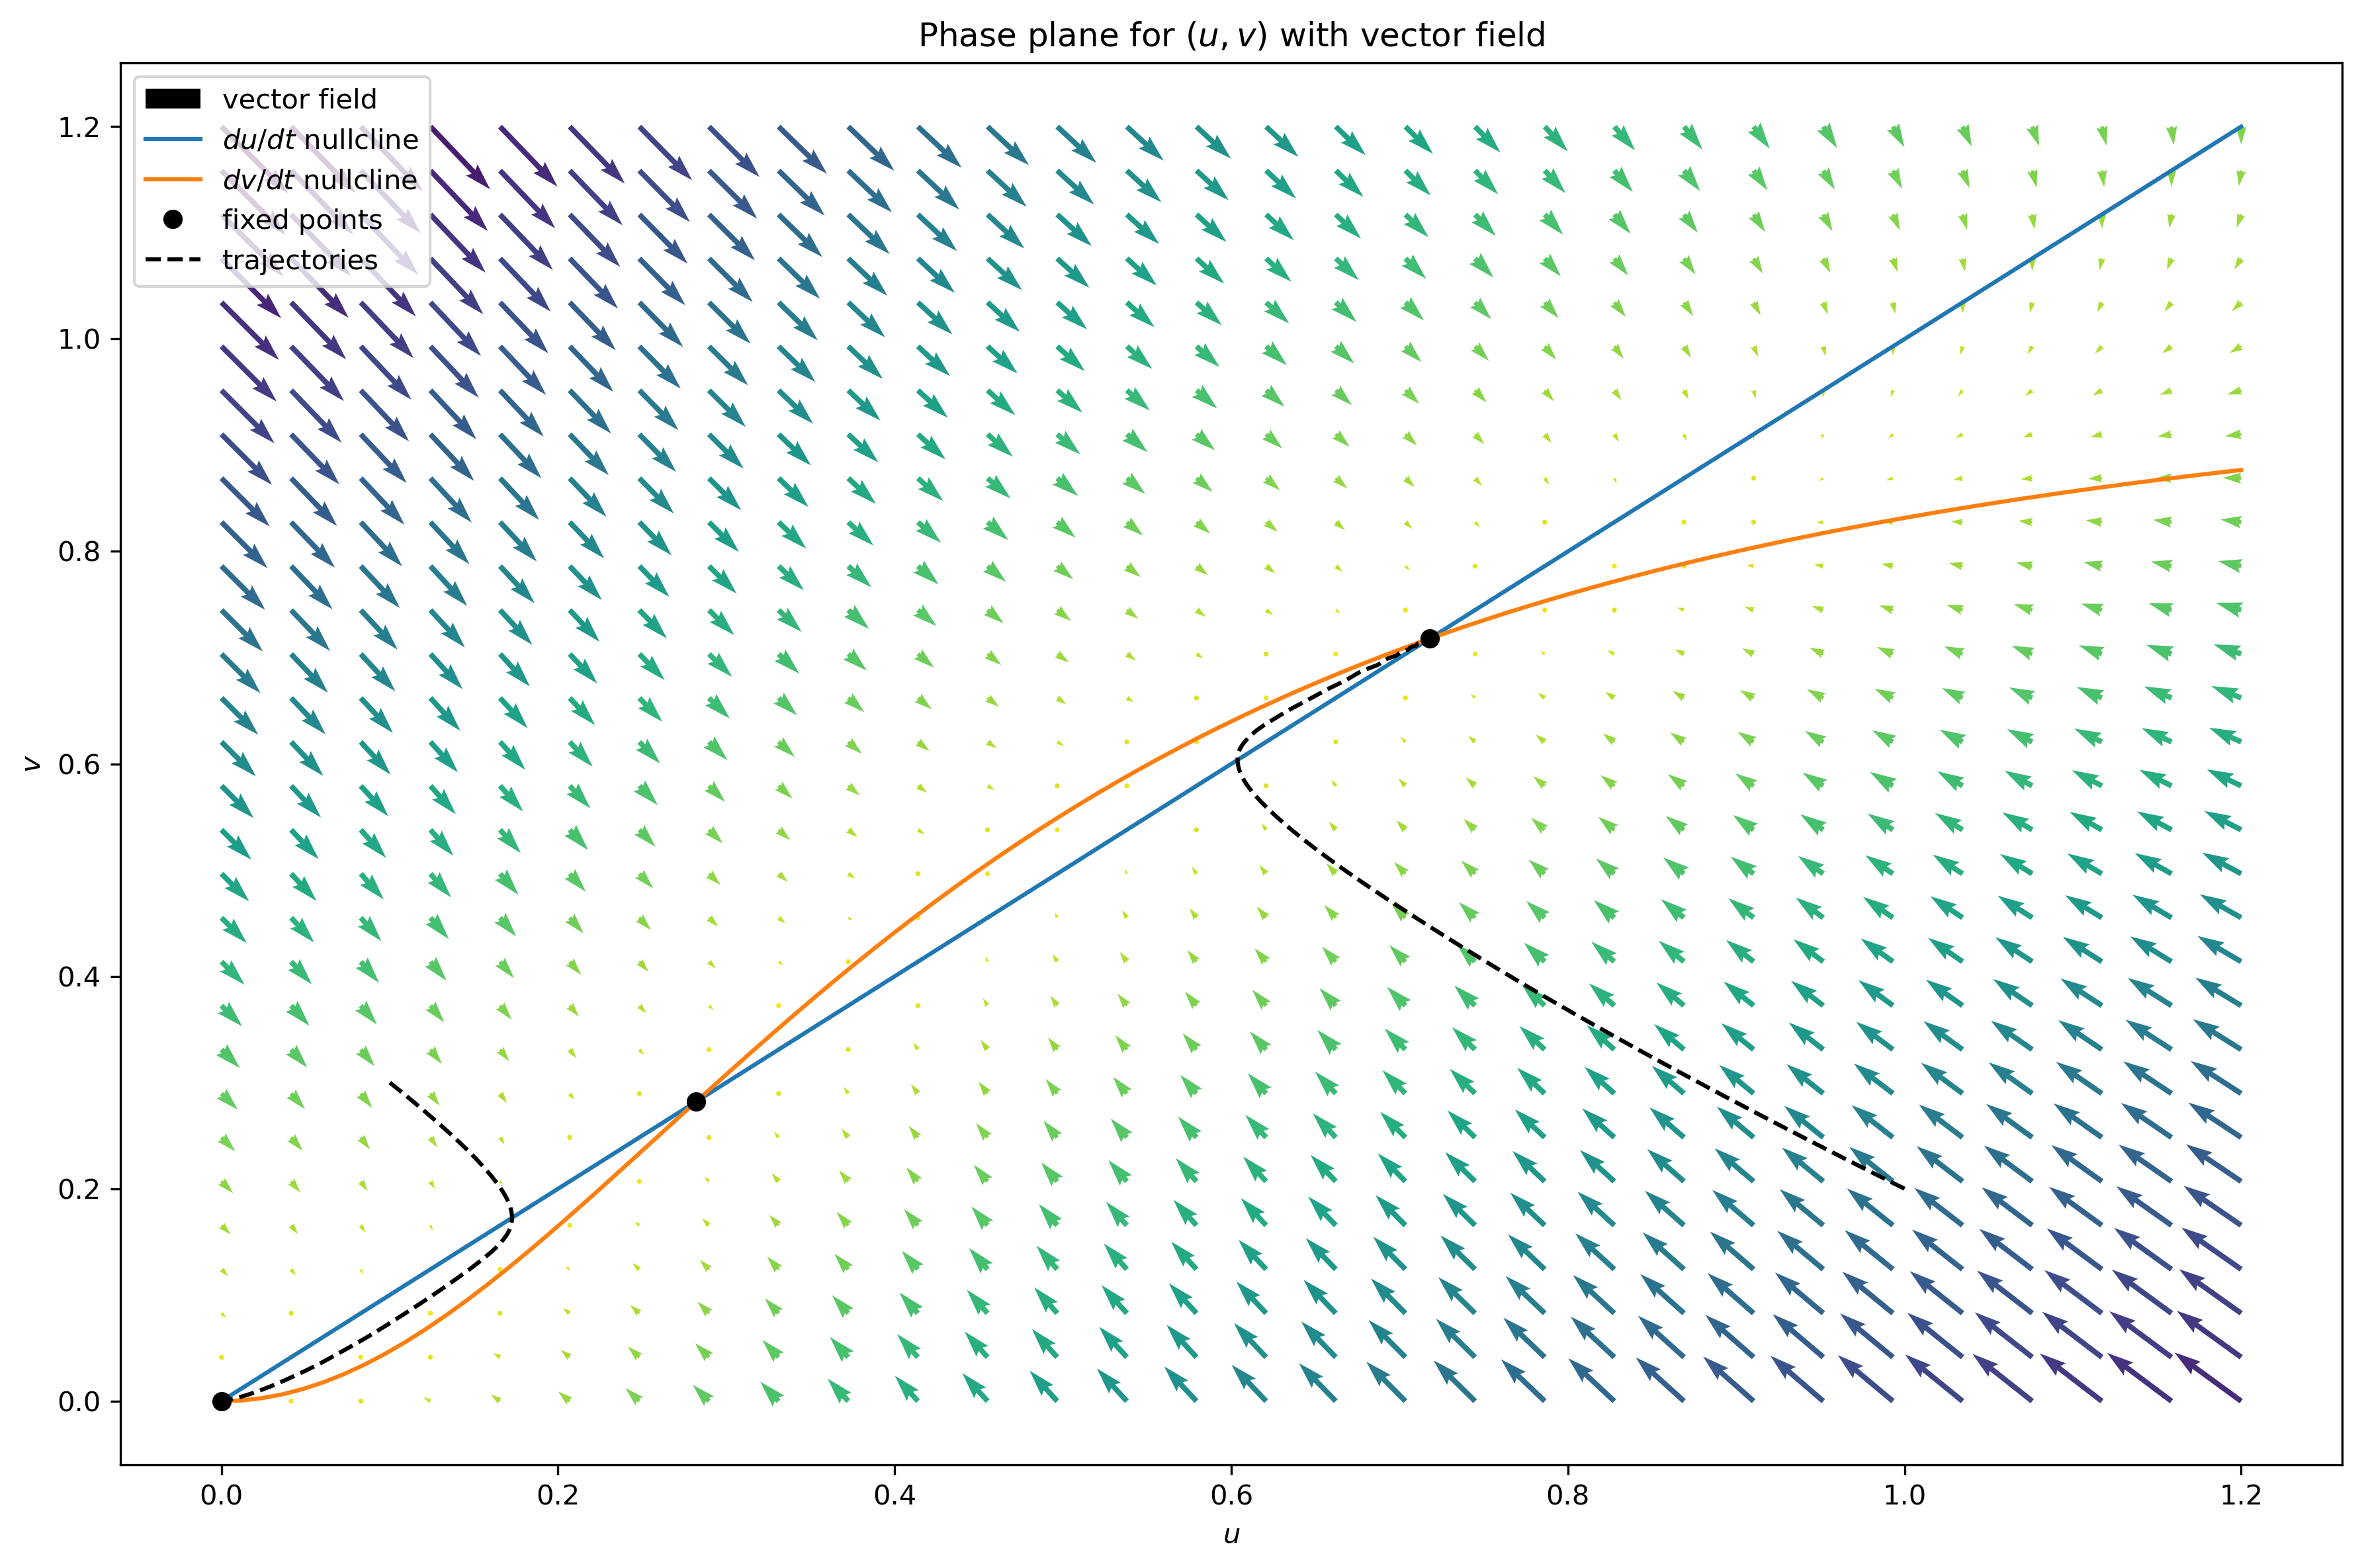

In [15]:
# PLOT THE FIGURE
fig.tight_layout()
fig